In [ ]:
!pip install numpy pandas scikit-fuzzy matplotlib requests


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('./data.csv')
percentage = 0.3
data[:int(len(data) = percentage)]

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,519248.0,"AT, CH, DE"
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,8.2,1228454.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CI, CM, CZ..."
2,Jarhead,movie,"Biography, Drama, War",2005.0,7.0,212748.0,"AD, AE, AG, AO, BH, BM, BR, BS, BZ, CI, CM, CO..."
3,Unforgiven,movie,"Drama, Western",1992.0,8.2,446602.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO..."
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,8.3,1113480.0,"AD, AE, AG, AL, AO, AR, AU, AZ, BA, BB, BE, BG..."
...,...,...,...,...,...,...,...
5681,Facet (nie)potrzebny od zaraz,movie,"Comedy, Drama, Music",2014.0,4.4,398.0,"AT, BE, BG, BM, CH, CY, CZ, DE, DK, EE, ES, FI..."
5682,The Smile of a Child,movie,"Comedy, Drama, Music",1969.0,4.8,44.0,"AL, AT, BA, BE, BG, CH, CZ, DE, DK, EE, FI, FR..."
5683,Kundo: Age of the Rampant,movie,"Action, Drama",2014.0,6.8,3954.0,KR
5684,The Mummy,movie,"Action, Adventure, Fantasy",2017.0,5.4,211329.0,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."


In [ ]:
min_year = data['releaseYear'].min()
max_year = data['releaseYear'].max()
man_votes = data['imdbNumVotes'].max()

print (f"realase Year Range: {min_year} - {max_year}")
print (f"imdbNumVotes Range: 0 - {man_votes}")

imdb_rating = ctrl.Antecedent(np.arange(0, 10, 0.1), 'imdbRating')
realese_year = ctrl.Antecedent(np.arange(min_year, max_year + 1, 1), 'releaseYear')
num_votes = ctrl.Antecedent(np.arange(0, man_votes + 1, 10000), 'imdbNumVotes')
movie_quality = ctrl.Consequent(np.arange(0, 10,1), 'movie_quality')

realase Year Range: 1913.0 - 2024.0
imdbNumVotes Range: 0 - 2981119.0


In [ ]:
# IMDb Rating Membership Functions
imdb_rating['low'] = fuzz.trapmf(imdb_rating.universe, [0, 0, 3, 5])
imdb_rating['medium'] = fuzz.trimf(imdb_rating.universe, [4, 5.5, 7])
imdb_rating['high'] = fuzz.trapmf(imdb_rating.universe, [6, 8, 10, 10])

# Release Year Membership Functions
realese_year['classic'] = fuzz.trapmf(realese_year.universe, [min_year, min_year, 1970, 1990])
realese_year['modern'] = fuzz.trimf(realese_year.universe, [1985, 2000, 2010])
realese_year['contemporary'] = fuzz.trapmf(realese_year.universe, [2000, 2020, max_year, max_year])

# Number of Votes Membership Functions
num_votes['few'] = fuzz.trapmf(num_votes.universe, [0, 0, 50000, 150000])
num_votes['average'] = fuzz.trimf(num_votes.universe, [100000, 200000, 400000])
num_votes['many'] = fuzz.trapmf(num_votes.universe, [300000, 500000, man_votes, man_votes])

# Movie Quality Membership Functions
movie_quality['low'] = fuzz.trapmf(movie_quality.universe, [0, 0, 3, 5])
movie_quality['medium'] = fuzz.trimf(movie_quality.universe, [4, 5.5, 7])
movie_quality['high'] = fuzz.trapmf(movie_quality.universe, [6, 8, 10, 10])

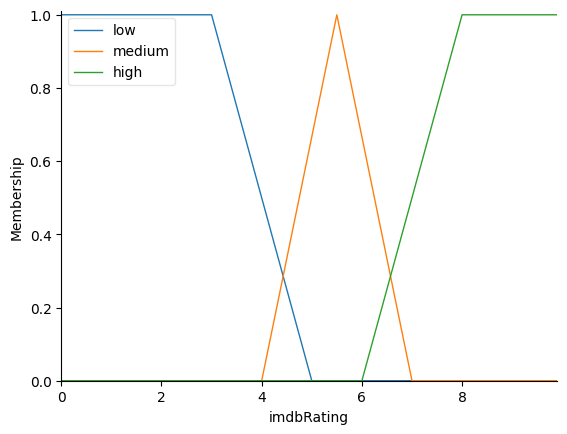

In [ ]:
imdb_rating.view()
plt.show()

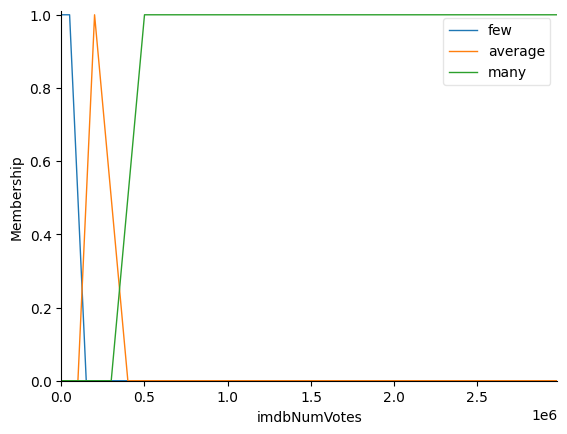

In [ ]:
num_votes.view()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

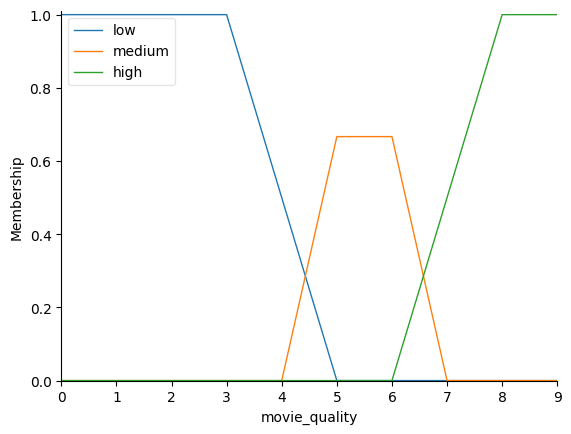

In [ ]:
movie_quality.view()
plt.show

In [ ]:
rule1 = ctrl.Rule(imdb_rating['high'] & num_votes['many'], movie_quality['high'])
rule2 = ctrl.Rule(imdb_rating['medium'] & num_votes['average'], movie_quality['medium'])
rule3 = ctrl.Rule(imdb_rating['low'] & num_votes['few'], movie_quality['low'])
rule4 = ctrl.Rule(imdb_rating['high'] & realese_year['classic'], movie_quality['high'])
rule5 = ctrl.Rule(imdb_rating['medium'] & realese_year['modern'], movie_quality['medium'])
rule6 = ctrl.Rule(imdb_rating['low'] & num_votes['few'], movie_quality['low'])
rule7 = ctrl.Rule(imdb_rating['high'], movie_quality['high'])
rule8 = ctrl.Rule(imdb_rating['medium'], movie_quality['medium'])
rule9 = ctrl.Rule(imdb_rating['low'], movie_quality['low'])

In [ ]:
movie_quality_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9
])

In [ ]:
# Function to compute movie quality
def compute_movie_quality(row):
    # Create a new simulation instance for each row
    movie_quality_simulation = ctrl.ControlSystemSimulation(movie_quality_ctrl)

    # Initialize variables
    imdb_rating_value = None
    release_year_value = None
    num_votes_value = None

    try:
        # Set input values
        imdb_rating_value = row['imdbAverageRating']
        release_year_value = row['releaseYear']
        num_votes_value = row['imdbNumVotes']

        # Clip inputs to universes
        imdb_rating_value = np.clip(imdb_rating_value, imdb_rating.universe[0], imdb_rating.universe[-1])
        release_year_value = np.clip(release_year_value, realese_year.universe[0], realese_year.universe[-1])
        num_votes_value = np.clip(num_votes_value, num_votes.universe[0], num_votes.universe[-1])

        # Set inputs
        movie_quality_simulation.input['imdbRating'] = imdb_rating_value
        movie_quality_simulation.input['releaseYear'] = release_year_value
        movie_quality_simulation.input['imdbNumVotes'] = num_votes_value

        # Compute the fuzzy result
        movie_quality_simulation.compute()

        return movie_quality_simulation.output['movie_quality']

    except Exception as ex:
        print(f"Error computing for row {row.name}: {ex}")
        print(f"Inputs: imdb_rating={imdb_rating_value}, release_year={release_year_value}, num_votes={num_votes_value}")
        return np.nan

# Apply the fuzzy logic model to the dataset
data['movie_quality_score'] = data.apply(compute_movie_quality, axis=1)

In [ ]:
data.head()

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries,movie_quality_score
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,519248.0,"AT, CH, DE",7.851515
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,8.2,1228454.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CI, CM, CZ...",7.916667
2,Jarhead,movie,"Biography, Drama, War",2005.0,7.0,212748.0,"AD, AE, AG, AO, BH, BM, BR, BS, BZ, CI, CM, CO...",7.733333
3,Unforgiven,movie,"Drama, Western",1992.0,8.2,446602.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO...",7.916667
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,8.3,1113480.0,"AD, AE, AG, AL, AO, AR, AU, AZ, BA, BB, BE, BG...",7.916667
